In [80]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import *
from sklearn.model_selection import *
import statsmodels.api as sm
import scipy.stats as stats
            
import regex as re
import requests
from bs4 import BeautifulSoup

# Feedback (to revise, bold todo)
Hi guys, nice progress! Here are some comments to further develop your project

Introduction: good intro of research question and why it's relevant to people!

Data Description: answered all datasheet questions, but I'd also add a brief summary and list of all the columns with their respective data types to give better context of variables.

Pre-registration Statement: Good questions, would like to see a brief summary of what methods you are going to use to evaluate them in this section.

Data Analysis: Good usage of models and interpretations!
I'd recommend using the correlation matrix before fitting your regressions, because you generally want to do dimension reduction before running models to take out any extraneous features.
You generally don't want to fit a linear regression on binary variables and categorical/binary predictors fit better as dummy variables

**Residual analysis: make sure to check if all the linear assumptions are satisfied in addition to random residuals
Note on terminology: the regression r square value is not the same as the correlation r^2 (as in correlation matrix). The R^2 is the proportion of the variance in the outcome variable that is explained by the predictors in a regression model, more like a measure of overall model fit. Correlation is a measure of linear relationship between two variables
**I see there are comments in code, but would also be helpful to add more markdown cells between code chunks to explain what the code is doing (i.e the permutation test )**

Evaluation of Significance: kind of combined with data analysis and interpretation section? Should have a separate section for evaluating metrics of statistical significance, such as linear regression assumptions

Interpretation and Conclusion: good interpretations and conclusions, could add brief summary of all the methods and tests used and which were significant
- [John] added brief summary before we did all the hypothesis tests

Limitations: good limitations, could elaborate how these limitations could affect the meaning of results and impact of results on people
- [John] added a sentence or two at the end

**Writing: Good explanatixons but would like to see more markdowns between code cells.**

**Organization and focus: good overall flow, transitions could be smoother between sections (i.e was unclear which model the residual plot is for and why you chose to use which methods)**

Nice job and let me know if you have any questions! :)

# Project Phase V, Final

### Introduction

Why do people live longer lives in some countries than others?

Why are life expectancies higher in some countries than others?

One would expect that things like living around violent crime, having healthy food, or having good genetics may all play a role in how long people live. Therefore, by analyzing socioeconomic factors like violent crime rates, healthcare, diet, economic development, genetics, and happiness level, we aimed our project at being able to learn more about which factors really influence life expectancies and which do not. We later find that calorie consumption, education, income, happiness, and having univeral healthcare each individually have statistically significant results that they tend to increase life expectancies in a country. Lastly, we looked to data within our dataset to determine how to maximize life expectancy in a country, according to our model, and creating a country that would have the highest life expectancy and outperform the country with the current highest life expectancy, Japan.

Knowing which of these factors are strong can be valueable when deciding how a government should spend and write policies to increase the life span of their citizens. Weak factors can also benefit goverment decision making by possibly reducing the amount of effort spent in these regards, if they intend to maximize life expectancy.

One can extrapolate the country data to infer more individualized insights. If these factors on average within a given country correlate to the country having a higher life expectancy, perhaps they can also indicate ways to increase an individual's life expectancy. Although this hypothesis is not tested in this project, future research can be done in estimating an individual's life expectancy based on their behaviors and environment.

# Data Description

### What are the observations (rows) and the attributes (columns)? <br>
On the vertical we have countries, with their respective data in the columns. Columns include `Country`(later used as an index), `Life Expectancy`, `Homicide Rate`, `Mean years of schooling`, `Gross national income (GNI) per capita`, `kg meat/person`, `cal`, `has_uhc`, `happiness_index`, `genetic_index`, `level of human development`. We starting with these columns because we infered that they had an impact on an individuals life length. Every column other than the country's names is a float, with null values set as -99.9 to allow for simple sorting and then filtered out for analysis. Countries' data uses the most recent metric in each row that was able to be found online. Our dependent variable, which we are investigating, is life expectancy, and how it changes in relationship to the metrics above.

The homicide rate measures the number of homicides in a country per year per 100,000 people. Mean years of schooling measures the average years of education a person has in each given country. GNI per capita measures the average income for a county's citizens and is Purchasing Power Parity adjusted. Kg meat per person simply measures the per capita amount of carcass mass eaten in each country. Then, we have another column for diet, cal, which measures the average daily caloric intake for each countries' people. Then, has_uhc simply is a binary variable, with 1 for a country that has universal healthcare and a 0 for a country without universal healthcare. Our happiness index is from the World Happiness Report which published a data set of happiness indices, which measure the emotions, or happiness, of people from different countries to create an index for each country. The genetic index column holds the probability for each country of their citizens dying from any of cardiovascular disease, cancer, diabetes, and chronic respiratory disease between age 30 and exact age 70 as a percentage, measuring possibly genetic relationships between late-life diseases and a country. Finally, the level of human development column measures the overall wellbeing of a citizen on average in a country, including their longevity and standard of living.

### Why was this dataset created? <br>
This dataset was created to investigate life expectancy and its relationships with macroeconimic and societal factors, such as GNI per capita, level of education, diet, happiness, etc. Having all of these possible factors in one dataset helps us use statistical methods to analyze the data, deciding which metrics are collinear and which are statistically significant to our target variable, life expectancy.

### What processes might have influenced what data was observed and recorded and what was not? <br>
Our dataset consists of data gathered in recent years and in countries around the world. This has an adverse effect on the quality of the data, given that the pandemic likely negatively impacted life expectancies. Additionally, while there are 195 countries, only 109 of them are in our dataset. The dataset is missing countries for two reasons. First, and most prominently, was because some countries had missing values which could not be effectively imputed, so they removed from the dataset for ease of analysis. We have noticed that smaller countries or those that are more protective with their data, often had these missing data values or outdated metrics. Secondly, many countries appeared in datasets with different names, which caused significant trouble when merging dataframes by country names. While most were renamed to allow for the merge, some became too difficult to match up, so they were omitted from the analysis. However, maintaining a high sample size was a priority for us, so our data could better represent the overall population of countries, although this may have influenced our data and created a sampling error.

### What preprocessing was done, and how did the data come to be in the form that you are using? <br>
Much of the preprocessing had to do trying to combine datasets from varying sources, each with their own ways of categorizing data (such as UN's labelling of certain countries as "high human development", etc.) that introduce additional, not-so-relevant data into the middle of every couple of rows. Another massive issue was the various names that countries can go by. The United States, for example, can go as `USA`, `United States`, `The United States of America`, etc. After renaming countries to have the same name across datasets, we were able to merge them into a final dataframe with 109 rows, for each country, and 10 metrics, 9 metrics in addition to our dependent variable life expectancy.

### Where can your raw source data be found, if applicable? Provide a link to the raw data (hosted in a Cornell Google Drive or Cornell Box). <br>
All datasets have their links attached throughout the data cleaning notebook, with some copies in the `data` folder in this project.

# Basic Data Analysis

Here we have basic summary statistics of the data found.

In [106]:
df_final = pd.read_csv("data/final.csv")
df_final = df_final.set_index("Country")
df_final.head()

,Life Expectancy,Homicide Rate,Mean years of schooling,Gross national income (GNI) per capita,kg meat/person,cal,has_uhc,happiness_index,genetic_index,level of human development
Country,,,,,,,,,,
Albania,78.686,2.29,11.286455,14131.11039,47.51,3360.0,1.0,5.117,11.4,3
United Arab Emirates,78.120,0.46,12.694030,62573.59181,62.03,3314.0,1.0,6.561,18.5,4
Argentina,76.813,5.32,11.147269,20925.26814,109.39,3307.0,1.0,5.929,15.7,4
Armenia,75.224,1.69,11.330300,13157.99390,45.64,2997.0,0.0,5.283,19.9,3
Australia,83.200,0.89,12.726820,49238.43335,121.61,3391.0,1.0,7.183,8.6,4


### Summary Statistics

In [107]:
df_final.describe()

,Life Expectancy,Homicide Rate,Mean years of schooling,Gross national income (GNI) per capita,kg meat/person,cal,has_uhc,happiness_index,genetic_index,level of human development
count,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000
mean,74.181112,6.087523,9.538524,22451.396131,49.363211,2957.293578,0.541284,5.671046,17.846789,2.990826
std,6.934363,10.228273,3.063096,19594.529183,29.018068,452.467500,0.500594,1.062122,6.897471,1.084362
min,54.836000,0.260000,2.114962,1198.073924,3.780000,1908.000000,0.000000,3.145000,7.900000,1.000000
25%,70.056000,1.170000,7.192013,6589.980037,20.340000,2662.000000,0.000000,4.934000,11.000000,2.000000
50%,75.387805,2.200000,10.427910,15241.914650,53.490000,3019.000000,1.000000,5.813000,17.800000,3.000000
75%,79.208000,5.370000,12.191084,37931.303590,73.010000,3322.000000,1.000000,6.317000,22.600000,4.000000
max,84.615610,52.020000,14.090967,84649.474670,121.610000,3885.000000,1.000000,7.842000,42.700000,4.000000


# Preregistration 

We will analyze several socioeconomic factors and determine how stastically signficant they are to life expectancy. The questions will try to answer are:
- Do people that eat more live longer? 
- Are more educated people living longer? 
- Do people with higher income live longer?
- Are happier people living longer?
- Do countries with universal healthcare have longer living citizens?

For our questions, we will use hypothesis testing such as t-tests and permutation tests to conduct relationships between the independent variables and our dependent variable, life expenctancy, to statistically test the relationships between them. These tests help us decide if our beta value, which describes the relationship between our independent and dependent variables, is in the range of random or is more likely under some sort of correlation between the variables.

# Hypothesis Testing and Evaluation of Significance

We will answer each of the preregistrations by running regressions isolating each variable and getting predictions from those models. If the p-value for the predictions are significant enough, we can declare that there is indeded a relationship between education, e.g., and life expectancy. We will also provide a summary of errors, various significance tests, and residual error plots.

## Do people that eat more live longer?
   * H0: People from a country that has a higher consumption live as long as others on average.
   * HA: People from countries that eat more on average live longer than those from countries with less consumption. 

In [111]:
df_h1 = df_final[["Life Expectancy","cal"]].sort_values('cal')
df_h1.head()

,Life Expectancy,cal
Country,,
Zimbabwe,61.738,1908.0
Uganda,63.713,1981.0
Zambia,64.194,2002.0
Mozambique,61.387,2103.0
Tajikistan,71.301,2109.0


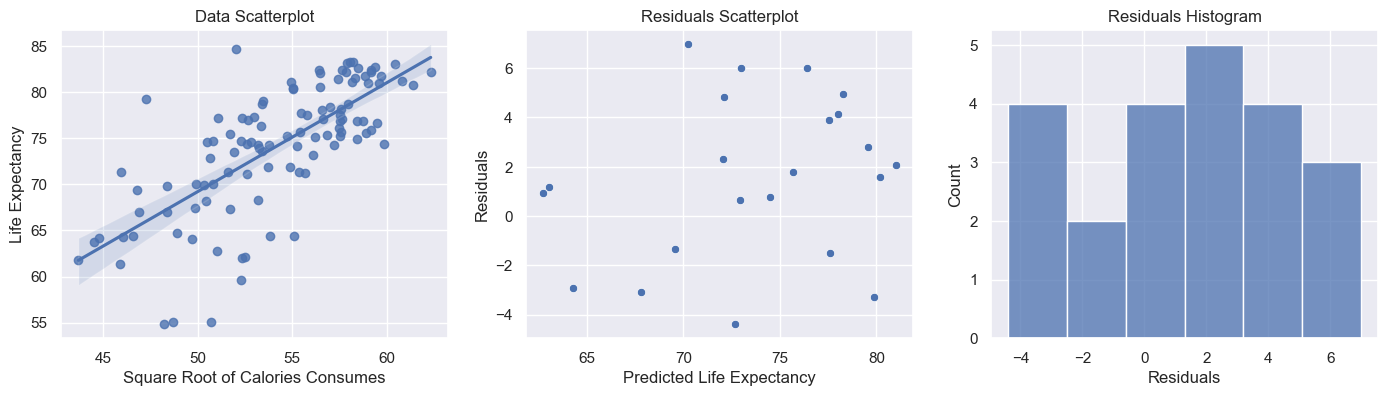

Slope of Model: 1.14 
Intercept of Model: 11.83
Train RMSE: 5.05 
Test RMSE: 3.57
Train R Squared: 0.46 
Test R Squared: 0.73

Right-sided P-Value at 97.5% CL: 4.700633001111161e-130
                                 OLS Regression Results                                
Dep. Variable:        Life Expectancy   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          2.546e+04
Date:                Fri, 09 Dec 2022   Prob (F-statistic):                   4.70e-130
Time:                        13:25:40   Log-Likelihood:                         -326.59
No. Observations:                 109   AIC:                                      655.2
Df Residuals:                     108   BIC:                                      657.9
Df Model:                           1                                                  
Covariance Type:         

In [100]:
sns.set(rc={'figure.figsize':(17,4)})

#Used sqrt transformation because data showed strong curve and slightly heteroskedastic
X = np.sqrt(df_h1["cal"].to_numpy().reshape(-1,1))
y = (df_h1["Life Expectancy"])
calories_train, calories_test, exp_train, exp_test = train_test_split(X, y, test_size=0.2, random_state=10)
model_h1 = LinearRegression().fit(calories_train,exp_train)
train_predictions = model_h1.predict(calories_train)
test_predictions = model_h1.predict(calories_test)

#errors
train_r_squared = model_h1.score(calories_train,exp_train)
test_r_squared = model_h1.score(calories_test,exp_test)
train_residuals = exp_train - train_predictions
test_residuals = exp_test - test_predictions
train_rmse = np.sqrt(np.mean(train_residuals**2))
test_rmse = np.sqrt(np.mean(test_residuals**2))

#plots
OLS_model_h1 = sm.OLS(y, X).fit()
f, (ax1, ax2, ax3) = plt.subplots(1, 3)
sns.regplot(x = X,y = y, ax = ax1).set(title = "Data Scatterplot", xlabel='Square Root of Calories Consumes', ylabel='Life Expectancy')
sns.scatterplot(x = test_predictions, y = test_residuals, ax = ax2).set(title = "Residuals Scatterplot", xlabel='Predicted Life Expectancy', ylabel='Residuals')
sns.histplot(test_residuals, ax = ax3).set(title = "Residuals Histogram",xlabel='Residuals', ylabel='Count')
plt.show()
print("Slope of Model:",f'{model_h1.coef_[0]:.2f}',"\nIntercept of Model:",f'{model_h1.intercept_:.2f}')
print("Train RMSE:",f'{train_rmse:.2f}',"\nTest RMSE:",f'{test_rmse:.2f}')
print("Train R Squared:",f'{train_r_squared:.2f}',"\nTest R Squared:",f'{test_r_squared:.2f}')
print("\nRight-sided P-Value at 97.5% CL:",OLS_model_h1.t_test(1).pvalue)
print(OLS_model_h1.summary())

After transforming the calorie data by square rooting it, our linear regression yields an R squared value of 0.73 for the test data, suggesting that 73% of the variability in life expectancy for a country in the test data is explained by this square root of calories consumed model. Our train RMSE is higher than our test RMSE which also suggests that our model is not overfitting. Additionally, the R squared is much higher for the test data than the train data, which suggests again that the model is likely not overfitting.

When running a correlation test to analyze our hypothesis, we can reject the null hypothesis and predict that countries with higher average calorie consumption have higher life expectancies with a confidence level of 97.5%. Because our two-sided test with CL 95% yields a p-value of approximately 0 and our coefficient is positive, we can conclude that our right-side test would have the same p-value with a CL of 97.5%. This gives us a type I error proability of 2.5%. Our model intercept suggests that someone who eats 0 calories a day will live a predicted 11.83 years, which is an oddity of our model that is unrealistic and clearly untrue. Our slope suggests that each square root calorie increase also increases the life expectancy prediction by 1.14 years. 

The four assumptions of linear regressions are linear relationships, independence, homoskedasticity, and normality. With a approximately random looking residual plot, we can assume a linear relationship after transformation. Each country should have roughly independent data from each other, so the independence can be assumed. The data seems to look homoskedastistic, so we can assume homoskedasticity as well. Finally, the residuals in the residuals histogram appear approximately normally distributed, so we can ultimately conclude that this linear model and subsequent hypothesis test meets all of the statistical assumptions. 

## Are more educated people living longer?
* We will use `Mean years of schooling` as a metric for level of education.
* H0: A country’s average education level does not affect their citizens’ life expectancies.
* HA: People from countries with higher average education levels live longer. 

In [112]:
df_h2 = df_final[["Life Expectancy","Mean years of schooling"]].sort_values('Mean years of schooling')
df_h2.head()

,Life Expectancy,Mean years of schooling
Country,,
Burkina Faso,61.981,2.114962
Niger,62.792,2.116717
Senegal,68.213,2.937938
Mozambique,61.387,3.197642
Ethiopia,66.953,3.201521


In [ ]:
X = (df_h2["Mean years of schooling"].to_numpy().reshape(-1,1))
y = (df_h2["Life Expectancy"])
schooling_train, schooling_test, exp_train, exp_test = train_test_split(X, y, test_size=0.2, random_state=95)
model_h2 = LinearRegression().fit(schooling_train,exp_train)
train_predictions = model_h2.predict(schooling_train)
test_predictions = model_h2.predict(schooling_test)

#errors
train_r_squared = model_h2.score(schooling_train,exp_train)
test_r_squared = model_h2.score(schooling_test,exp_test)
train_residuals = exp_train - train_predictions
test_residuals = exp_test - test_predictions
train_rmse = np.sqrt(np.mean(train_residuals**2))
test_rmse = np.sqrt(np.mean(test_residuals**2))
OLS_model_h2 = sm.OLS(y, X).fit()

#plots
f, (ax1, ax2, ax3) = plt.subplots(1, 3)
sns.regplot(x = X,y = y, ax = ax1).set(title = "Data Scatterplot", xlabel='Mean Years of Schooling', ylabel='Life Expectancy')
sns.scatterplot(x = test_predictions, y = test_residuals, ax = ax2).set(title = "Residuals Scatterplot", xlabel='Predicted Life Expectancy', ylabel='Residuals')
sns.histplot(test_residuals, ax = ax3).set(title = "Residuals Histogram",xlabel='Residuals', ylabel='Count')
plt.show()

#summary
print("Slope of Model:",f'{model_h2.coef_[0]:.2f}',"\nIntercept of Model:",f'{model_h2.intercept_:.2f}')
print("Train RMSE:",f'{train_rmse:.2f}',"\nTest RMSE:",f'{test_rmse:.2f}')
print("Train R Squared:",f'{train_r_squared:.2f}',"\nTest R Squared:",f'{test_r_squared:.2f}')
print("\nRight-sided P-Value at 97.5% CL:",OLS_model_h2.t_test(1).pvalue)
print(OLS_model_h2.summary())

Our linear regression yields an R squared value of 0.52 for our test data, suggesting that 52% of a country's life expectancy in the test data can be explained by this mean years of schooling regression model. Our train RMSE is about the same as our test RMSE which also suggests that our model is not overfitting. Additionally, the R squared value is about the same for the test data than the train data, which also suggests that the model is not overfitting.

When running a correlation test to analyze our hypothesis, we can reject the null hypothesis and predict that countries with longer average schooling have higher life expectancies with a confidence level of 97.5%. Because our two-sided test with CL 95% yields a p-value of approximately 0 and our coefficient is positive, we can conclude that our right-side test would have the same p-value with a CL of 97.5%. This gives us a type I error probability of 2.5%. The model intercepts predicts that a country with 0 years of average schooling would have a life expectancy of 58.67 years. The model also predicts that each one year increase in a country's average education will increase their life expectancy by 1.6 years.

With an approximately random residual plot, we can assume a linear relationship after transformation. Each country should have roughly independent data from each other, so the independence can be assumed. The data seems to look homoskedastistic, so we can assume homoskedasticity as well. The residuals in the residuals histogram appear to be approximately normally distributed, so we can conclude that this linear model and subsequent hypothesis test meets all of the statistical assumptions.



## Do people in first world countries live longer?
##### Adapted from Hypothesis 3 in Phase 3
* We will use `GNI per capita` as a metric, given that the UN's calculations for `Level of human development` (whether a country is highly developed/first world or not) already use life expectancy itself as an input.
* H0: Economic development (GNI) does not affect longevity. 
* HA: People in more economically developed countries live longer than people in developing countries.

In [113]:
df_h3 = df_final[["Life Expectancy","Gross national income (GNI) per capita"]].sort_values("Gross national income (GNI) per capita")
df_h3.head()

,Life Expectancy,Gross national income (GNI) per capita
Country,,
Mozambique,61.387,1198.073924
Niger,62.792,1239.866936
Liberia,64.423,1288.742350
Malawi,64.694,1465.635064
Sierra Leone,55.066,1621.512579


In [ ]:
X = (df_h3["Gross national income (GNI) per capita"].to_numpy().reshape(-1,1))
#apply log transformation because data shows strong log(x)-type, diminishing returns curve
X = np.log(df_h3["Gross national income (GNI) per capita"].to_numpy().reshape(-1,1))
y = (df_h3["Life Expectancy"])
GNI_train, GNI_test, exp_train, exp_test = train_test_split(X, y, test_size=0.2, random_state=94)
model_h3 = LinearRegression().fit(GNI_train,exp_train)
train_predictions = model_h3.predict(GNI_train)
test_predictions = model_h3.predict(GNI_test)

#errors
train_r_squared = model_h3.score(GNI_train,exp_train)
test_r_squared = model_h3.score(GNI_test,exp_test)
train_residuals = exp_train - train_predictions
test_residuals = exp_test - test_predictions
train_rmse = np.sqrt(np.mean(train_residuals**2))
test_rmse = np.sqrt(np.mean(test_residuals**2))

#plots
f, (ax1, ax2, ax3) = plt.subplots(1, 3)
sns.regplot(x = X,y = y, ax = ax1).set(title = "Data Scatterplot", xlabel='Log GNI per Capita', ylabel='Life Expectancy')
sns.scatterplot(x = test_predictions, y = test_residuals, ax = ax2).set(title = "Residuals Scatterplot", xlabel='Predicted Life Expectancy', ylabel='Residuals')
sns.histplot(test_residuals, ax = ax3).set(title = "Residuals Histogram",xlabel='Residuals', ylabel='Count')
plt.show()
OLS_model_h3 = sm.OLS(y, X).fit()

#summary
print("Slope of Model:",f'{model_h3.coef_[0]:.2f}',"\nIntercept of Model:",f'{model_h3.intercept_:.2f}')
print("Train RMSE:",f'{train_rmse:.2f}',"\nTest RMSE:",f'{test_rmse:.2f}')
print("Train R Squared:",f'{train_r_squared:.2f}',"\nTest R Squared:",f'{test_r_squared:.2f}')
print("\nRight-sided P-Value at 97.5% CL:",OLS_model_h3.t_test(1).pvalue)
print(OLS_model_h3.summary())

After the logarthmic transformation, our linear regression yields an R squared value of 0.59 for the test data, suggesting that 59% of the variability for a country's life expectancy in the test data can be explained by this log GNI per capita regression model. Our train RMSE is lower than our test RMSE which suggests that our model may be overfitting. Additionally, the R squared value is much lower for the test data than the train data, which also suggests that the model may be overfitting.

When running a correlation test to analyze our hypothesis, we can reject the null hypothesis and predict that countries with higher gross national incomes have higher life expectancies with a confidence level of 97.5%. Because our two-sided test with CL 95% yields a p-value of approximately 0 and our coefficient is positive, we can conclude that our right-side test would have the same p-value with a CL of 97.5%. This gives us a type I error probability of 2.5%. The model intercepts predicts that a country with a GNI of 1 would have a life expectancy of 23.82 years. The model also predicts that a 172%, (1-e)/100, increase in a country's GNI per capita will increase their life expectancy by 5.3 years.

With an approximately random looking residual plot, we can assume a linear relationship after transformation. Each country should have roughly independent data from each other, so the independence can be assumed. The data seems to look homoskedastistic, so we can assume homoskedasticity as well. Finally, the residuals in the residuals histogram appear approximately normally distributed, so we can ultimately conclude that this linear model and subsequent hypothesis test meets all of the statistical assumptions.

## Are happier people living longer?
   * H0: A country’s average happiness does not affect their citizens’ life expectancies.
   * HA: People from countries with higher happiness levels live longer. 

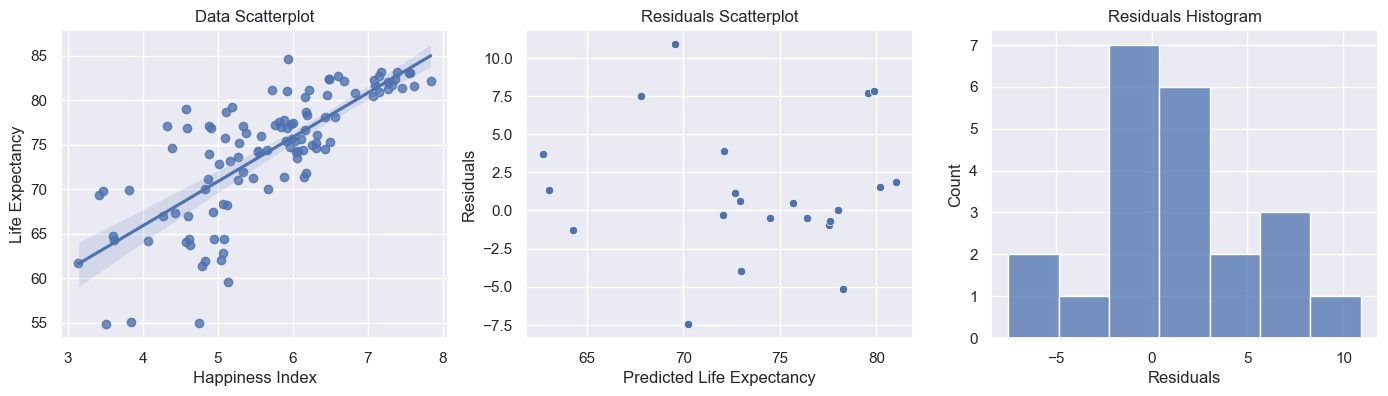

Slope of Model: 5.36 
Intercept of Model: 43.53
Train RMSE: 4.51 
Test RMSE: 4.45
Train R Squared: 0.58 
Test R Squared: 0.57
                                 OLS Regression Results                                
Dep. Variable:        Life Expectancy   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.983
Method:                 Least Squares   F-statistic:                              6484.
Date:                Fri, 09 Dec 2022   Prob (F-statistic):                    2.93e-98
Time:                        13:46:48   Log-Likelihood:                         -400.47
No. Observations:                 109   AIC:                                      802.9
Df Residuals:                     108   BIC:                                      805.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                             

In [114]:
#setup and run regression
X = df_final["happiness_index"].to_numpy().reshape(-1,1)
y = df_final["Life Expectancy"]
happy_train, happy_test, exp_train, exp_test = train_test_split(X, y, test_size=0.2, random_state = 78)
model_h4 = LinearRegression().fit(happy_train,exp_train)

#get errors
train_r_squared = model_h4.score(happy_train,exp_train)
test_r_squared = model_h4.score(happy_test,exp_test)
train_residuals = exp_train - model_h4.predict(happy_train)
test_preds = model_h4.predict(happy_test)
test_residuals = exp_test - test_preds
train_rmse = np.sqrt(np.mean(train_residuals**2))
test_rmse = np.sqrt(np.mean(test_residuals**2))

#plot regression
# sns.regplot(x = X,y = y).set(xlabel='Happiness', ylabel='Life Expectancy')
f, (ax1, ax2, ax3) = plt.subplots(1, 3)
sns.regplot(x = X,y = y, ax = ax1).set(title = "Data Scatterplot", xlabel='Happiness Index', ylabel='Life Expectancy')
sns.scatterplot(x = test_predictions, y = test_residuals, ax = ax2).set(title = "Residuals Scatterplot", xlabel='Predicted Life Expectancy', ylabel='Residuals')
sns.histplot(test_residuals, ax = ax3).set(title = "Residuals Histogram",xlabel='Residuals', ylabel='Count')
plt.show()
OLS_model_h4 = sm.OLS(y, X).fit()

#summary
print("Slope of Model:",f'{model_h4.coef_[0]:.2f}',"\nIntercept of Model:",f'{model_h4.intercept_:.2f}')
print("Train RMSE:",f'{train_rmse:.2f}',"\nTest RMSE:",f'{test_rmse:.2f}')
print("Train R Squared:",f'{train_r_squared:.2f}',"\nTest R Squared:",f'{test_r_squared:.2f}')
print(OLS_model_h4.summary())

Our happiness linear regression yields an R squared value of 0.57 for the test data, suggesting that 57% of the variability for a country's life expectancy in the test data can be explained by the country's happiness index. Our train RMSE is about the same as our test RMSE which suggests that our model is not overfitting. Additionally, the R squared value is about the same for the test data and the train data, which also suggests that the model is not overfitting.

When running a correlation test to analyze our hypothesis, we can reject the null hypothesis and predict that countries with higher indices have higher life expectancies with a confidence level of 97.5%. Because our two-sided test with CL 95% yields a p-value of approximately 0 and our coefficient is positive, we can conclude that our right-side test would have the same p-value with a CL of 97.5%. This gives us a type I error probability of 2.5%. The model intercepts predicts that a country with a happiness index of 0 would have a life expectancy of 43.53 years. The model also predicts that an increase in a country's happiness index by 1 will increase their life expectancy by 5.36 years.

With an approximately random looking residual plot, we can assume a linear relationship after transformation. Each country should have roughly independent data from each other, so the independence can be assumed. The data seems to look homoskedastistic, so we can assume homoskedasticity as well. Finally, the residuals in the residuals histogram appear approximately normally distributed, so we can ultimately conclude that this linear model and subsequent hypothesis test meets all of the statistical assumptions.

## Do people in countries with UHC (Universal Healthcare) live longer?
   * H0: People from countries with UHC live as long as people from countries without UHC. 
   * HA: People from countries with UHC live longer than people from countries without UHC.

Median Life Expectancy of Countries without UHC: 71.61 years
Median Life Expectancy of Countries with UHC: 77.46 years
Sample Difference in the Medians: 5.85 years


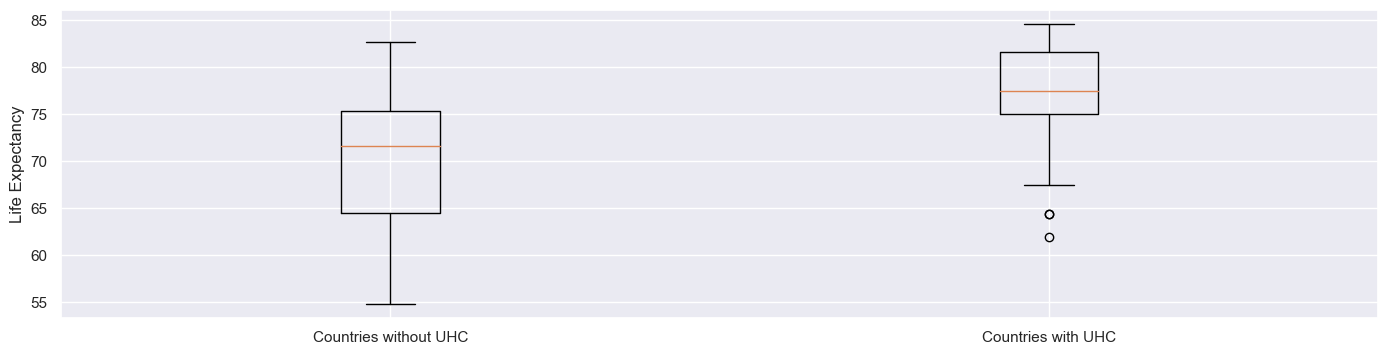

In [118]:
X = df_final["has_uhc"]
y = df_final["Life Expectancy"]

# Life Expectancy datasets according to presence of UHC
y_has_uhc = y[X == 1.0]
y_no_uhc = y[X != 1.0]

# Boxplot
fig, ax = plt.subplots()
ax.boxplot([y_no_uhc, y_has_uhc])
plt.xticks([1, 2], ["Countries without UHC", "Countries with UHC"])
plt.ylabel("Life Expectancy")
plt.show

# Sample Difference
print("Median Life Expectancy of Countries without UHC:", round(y_no_uhc.median(),2), "years")
print("Median Life Expectancy of Countries with UHC:", y_has_uhc.median(), "years")
sample_diff = round(y_has_uhc.median() - y_no_uhc.median(), 2)
print("Sample Difference in the Medians:", sample_diff, "years")

### Permutation test on UHC

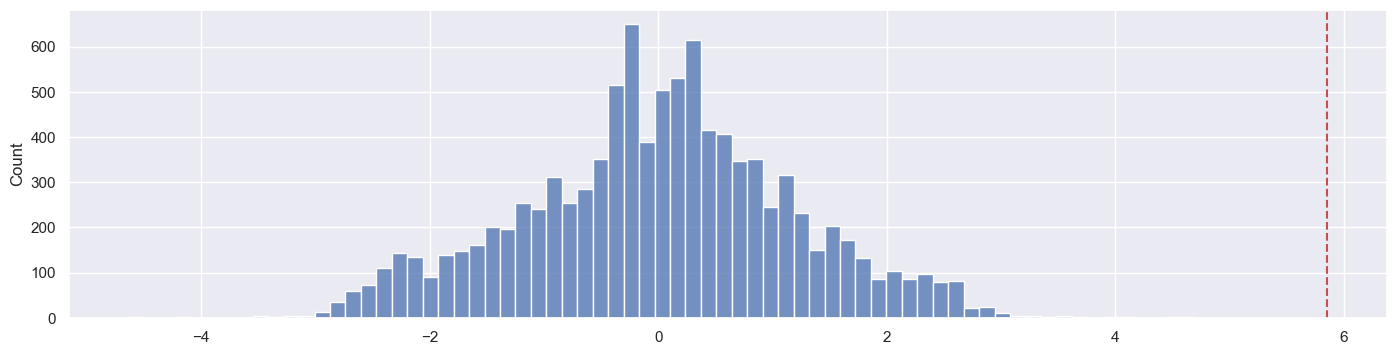

In [119]:
perm_diff = np.zeros(10000)
for i in range(10000):
    perm_X = np.random.choice(X, X.size, replace = False)
    perm_y_has_uhc = y[perm_X == 1.0]
    perm_y_no_uhc = y[perm_X != 1.0]
    perm_diff[i] = round(perm_y_has_uhc.median() - perm_y_no_uhc.median(), 2)

# Plot result
sns.histplot(perm_diff)
plt.axvline(sample_diff, color='r', ls='--')

#### Interpreting the permutation test

In [117]:
perm_mean = perm_diff.mean()
perm_std = perm_diff.std()
std_diff = (sample_diff - perm_mean)/perm_std

print("Mean:", round(perm_mean, 2))
print("Standard Deviation:", round(perm_std, 2))
print("Sample difference is", round(std_diff, 2), "standard deviations away from the mean")
print("p-value:", stats.norm.sf(std_diff))

Mean: -0.02
Standard Deviation: 1.17
Sample difference is 5.01 standard deviations away from the mean
p-value: 2.7555502908935354e-07


The p-value is significantly less than the significance level of 0.05, so we reject the null hypothesis that people from countries with UHC live as long as people from countries without UHC and conclude that having UHC increases a country's life expectancy. We can conclude this because our sample value is positive and our p-value is below half of the significance level.

# Interpretations for Preregistrations

- Do people that eat more live longer? Yes, significantly.
- Are more educated people living longer? Yes, significantly.
- Do people with higher income live longer? Yes, significantly.
- Are happier people living longer? Yes, significantly.
- Do countries with universal healthcare have longer living citizens? Yes, significantly.

We now have an idea of what factors attribute to longer life expectancies, but it would be remiss to not acknowledge that many of these are likely correlated. First world countries simply have more resources to send people to school, eat more, and spend more to live happily. Thus, the next section of our analysis will focus on identifying life expectancy-influencing factors that are as isolated, or non-collinear, as possible.


# Data Analysis

## Collinearity Matrix

We can see below that several of our pre-registered analyses consisted of highly collinear variables; `level of human development` is collinear with `mean years of schooling`, etc.

<AxesSubplot:>

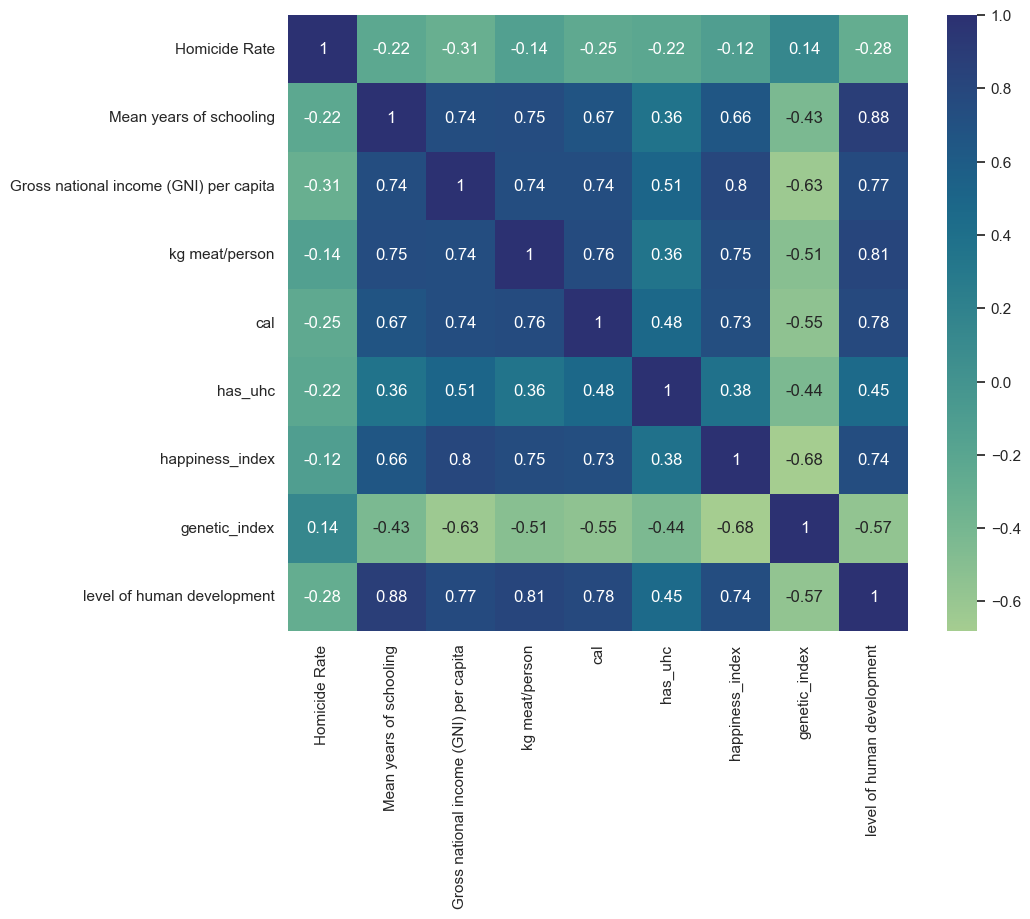

In [120]:
sns.set(rc={'figure.figsize':(10,8)})

collinearity_matrix = df_final.iloc[:,1:].corr()
sns.heatmap(collinearity_matrix, xticklabels=collinearity_matrix.columns,yticklabels=collinearity_matrix.columns,cmap="crest", annot=True)

## Remove Highly Collinear Variables

Given the collineary matrix above, we can see a high amount of collinearity between many of the variables. Removing those with a value > 0.7 leaves us with homicide rate, GNI per capita, whether or not a country has UHC, and the genetic index. 

<AxesSubplot:>

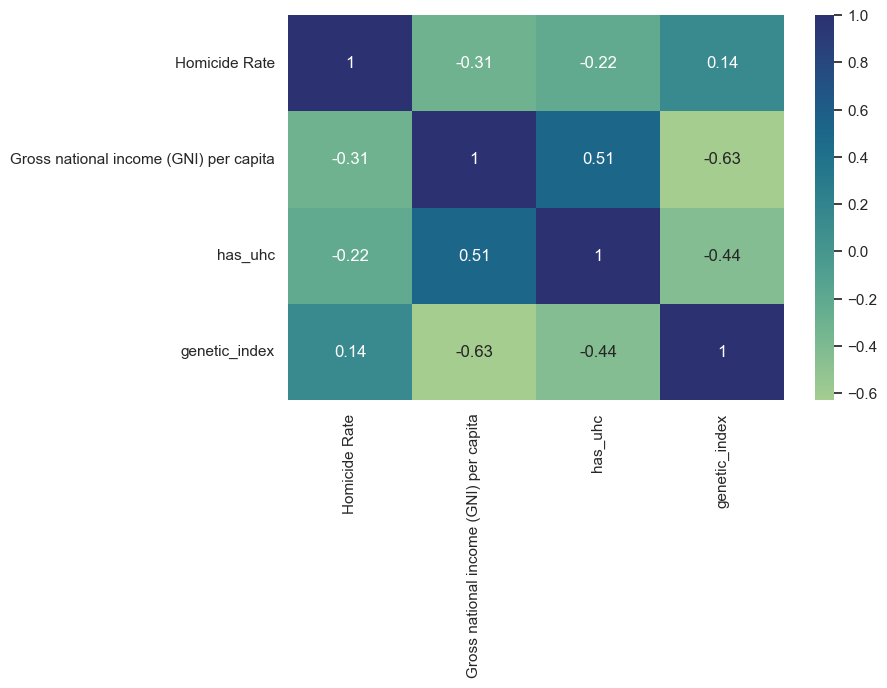

In [89]:
sns.set(rc={'figure.figsize':(8,5)})

collinearity_matrix2 = df_final[["Homicide Rate","Gross national income (GNI) per capita","has_uhc","genetic_index"]].corr()
sns.heatmap(collinearity_matrix2, xticklabels=collinearity_matrix2.columns,yticklabels=collinearity_matrix2.columns,cmap="crest", annot=True)

## Multivariate Regression Model (With Pruned Variables)

We make a multivariate regression, but with the highly collinear variables removed. We first isolate each variable and graph it in comparison to life expectancy to check for non-linear or heteroskedastic behavior.

#### GNI per capita: non-linear; log transform needed

Below is a chart showing GNI per capita vs Life expectancy. Given its non-linear shape, we need to apply a log transform.

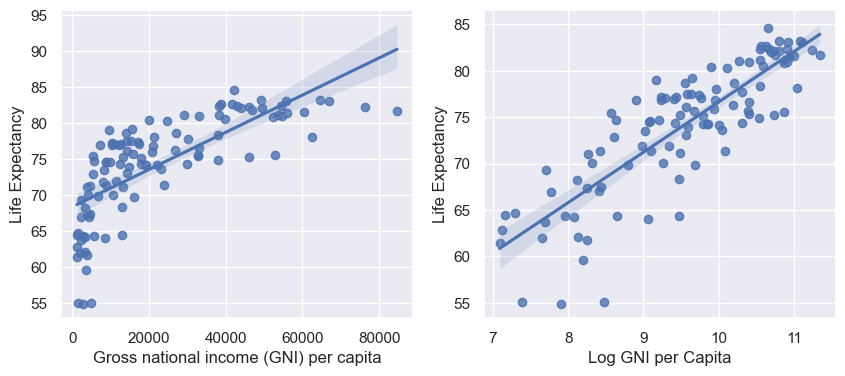

In [160]:
sns.set(rc={'figure.figsize':(10,4)})
#Determine Possible Transformations
#From Hypothesis 3, we know we need to use a log transformation on GNI per capita, which can also be seen below
df_model2 = pd.DataFrame(index=df_final.index)
df_model2["Life Expectancy"] = df_final["Life Expectancy"]
df_model2["Log GNI per Capita"] = np.log(df_final["Gross national income (GNI) per capita"])
f, (ax1, ax2) = plt.subplots(1, 2)
sns.regplot(data = df_final, x = "Gross national income (GNI) per capita",y = "Life Expectancy", ax = ax1)
sns.regplot(data = df_model2, x = "Log GNI per Capita",y = "Life Expectancy", ax = ax2)
plt.show()

#### Homicide Rate: heteroskedastic; log transform applied

The residual error plot below appears to be conic, indicating heterskedasticity. Applying a log transform seems to fix this problem, and creates a much more random residual error plot.

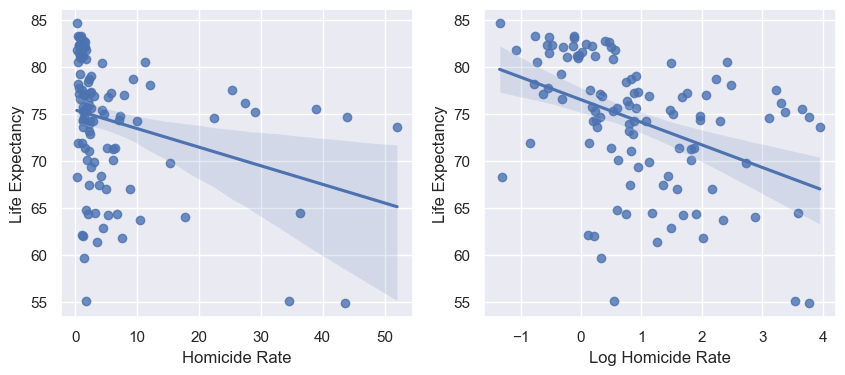

In [161]:
#Homicide Rate Transformations
#Showing high heteroskedastic behavior, need to apply a transformation that reduces variation as homicide rate increases
df_model2["Log Homicide Rate"] = np.log(df_final["Homicide Rate"])

f, (ax1, ax2) = plt.subplots(1, 2)
sns.regplot(data = df_final, x = "Homicide Rate",y = "Life Expectancy", ax = ax1)
sns.regplot(data = df_model2, x = "Log Homicide Rate",y = "Life Expectancy", ax = ax2)
plt.show()

#### has_UHC: binary variable; no transform possible to improve

Whether or not a country has universal healthcare is binary, so no transform can improve predictions.

In [162]:
df_model2["has_uhc"] = df_final["has_uhc"]

#### Genetic Index: approximately linear already; no transforms needed

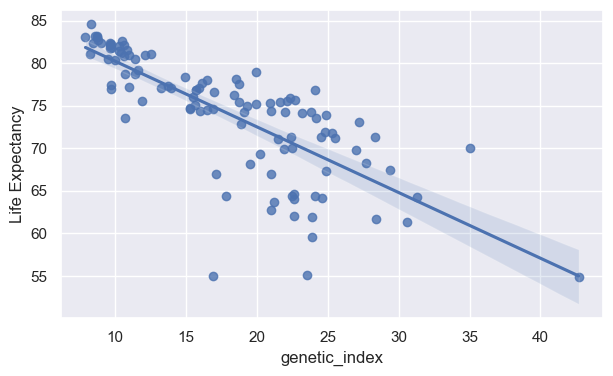

In [163]:
sns.set(rc={'figure.figsize':(7,4)})

#Genetic index transformation
sns.regplot(data = df_final, x = "genetic_index",y = "Life Expectancy")
plt.show()
#Data already looks linear
df_model2["genetic_index"] = df_final["genetic_index"]

In [164]:
df_model2.head()

,Life Expectancy,Log GNI per Capita,Log Homicide Rate,has_uhc,genetic_index
Country,,,,,
Albania,78.686,9.556134,0.828552,1.0,11.4
United Arab Emirates,78.120,11.044099,-0.776529,1.0,18.5
Argentina,76.813,9.948713,1.671473,1.0,15.7
Armenia,75.224,9.484785,0.524729,0.0,19.9
Australia,83.200,10.804430,-0.116534,1.0,8.6


#### Make the model

In [166]:
#Model creation
X = df_model2[["Log Homicide Rate","Log GNI per Capita","has_uhc","genetic_index"]]
y = df_model2["Life Expectancy"]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=78)
model2 = LinearRegression().fit(x_train,y_train)
train_predictions = model2.predict(x_train)
test_predictions = model2.predict(x_test)
train_residuals = y_train - train_predictions
test_residuals = y_test - test_predictions
train_rmse = np.sqrt(np.mean(train_residuals**2))
test_rmse = np.sqrt(np.mean(test_residuals**2))
print("Train RMSE:",f'{train_rmse:.2f}',"\nTest RMSE:",f'{test_rmse:.2f}')
print("Train R Squared",f'{model2.score(x_train,y_train):.2f}',"\nTest R Squared",f'{model2.score(x_test,y_test):.2f}')
print("Intercept", f'{model2.intercept_:.2f}')
slopes_model2 = pd.DataFrame(data = np.round_(model2.coef_.reshape(1,4),decimals=2),columns = X.iloc[:,:].columns)
print("Coefficients:")
slopes_model2.head()

Train RMSE: 3.05 
Test RMSE: 2.57
Train R Squared 0.81 
Test R Squared 0.86
Intercept 43.69
Coefficients:


,Log Homicide Rate,Log GNI per Capita,has_uhc,genetic_index
0,-0.33,3.9,-0.03,-0.36


## Overfitting Analysis

The model's test RMSE is much lower than the train RMSE which suggests that the model is not overfitting. The R squared values also suggest that the model is not overfitting, since the test R squared value is higher than the train R squared.

## Linear Assumptions and Analysis of Residuals

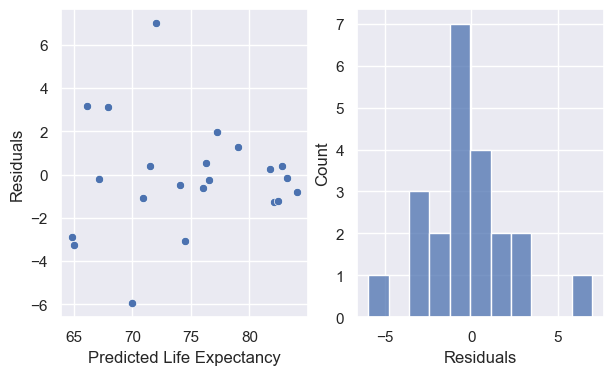

In [167]:
f, (ax1, ax2) = plt.subplots(1, 2)
sns.scatterplot(x = test_predictions, y = test_residuals, ax = ax1).set(xlabel='Predicted Life Expectancy', ylabel='Residuals')
sns.histplot(test_residuals, ax = ax2).set(xlabel='Residuals', ylabel='Count')
plt.show()

In the residual plot, our model shows approximately randomly placed residuals, indicating that the model is making predictions on an approximately linear set of data. Additionally, with a fairly high R squared value for both our train and test data, there is even more reason to conclude that there is a linear relationship between our variates and life expectancy. Each country should have roughly independent data from each other, so the independence can be assumed. 

The data seems to look homoskedastistic in the residual scatterplot, so we can make the assumption that there is no issue with heteroskedasticity in the model. Finally, the residuals in the residuals histogram appear approximately normally distributed, so we can ultimately conclude that this linear model and meets all of the associated statistical assumptions. 

## Model R Squared and Coefficient Analysis

In [168]:
slopes_model2.head()

,Log Homicide Rate,Log GNI per Capita,has_uhc,genetic_index
0,-0.33,3.9,-0.03,-0.36


The test data in our model has an R squared value of 0.86. This means that 86% percent of the variability in life expectancy from country to country can be explained by our linear model, homicide rate, GNI per capita, having universal healthcare, and late-life genetics.

The model's intercept predicts that a country with metrics of a homicide rate of 1, gross national income per capita of 1, no universal healthcare, and a zero genetic index (zero heart disease and late stage diseases) would have a life expectancy of 43.69 years. 

The homicide rate coefficient predicts that a country's life expectancy will decrease by 0.33 years as homicide rate increases by 172%, (1-e)/100.

The GNI per capita coefficient predicts that a country's life expectancy will increase by 3.90 years as homicide rate increases by 172%, (1-e)/100. 

The Universal Healthcare coefficient predicts that a country's life expectancy will decrease by 0.03 years if the country has UHC. This coefficient is suprising because it would be expected that while UHC not only increases life expectancy by providing more care to its people, but also that countries with UHC tend to already be more developed. Also, from our hypothesis testing, we concluded that having UHC increased a country's life expectancy. However, this coefficient is low and may be an artifact of the model and reminents of collinearity shifting weight towards another variate.

The genetic index coefficient predicts that a country's life expectancy will decrease by 0.36 years as their genetic index (measure of people with heart disease and late state diseases) increases by one. 

## The Perfect Country

This section will analyse which countries are performing best in each variate category. Then, the metrics from the best performing categories will be combined to find the life expectancy for "The Perfect Country".

In [169]:
slopes_model2.head()

,Log Homicide Rate,Log GNI per Capita,has_uhc,genetic_index
0,-0.33,3.9,-0.03,-0.36


#### Finding the best country for each variable

For variables with a negative slope, we will find the minimum value in our dataset. For variables with a positive slope, we will find the value a maximum.

In [170]:
#Find Minimum Value Country for Negative Coefficients and Maximum Value Countries for Positive Coefficients

# Country with lowest Log Homicide Rate
country_minHomicide = df_model2["Log Homicide Rate"].idxmin()
minHomicide = df_model2.loc[country_minHomicide,"Log Homicide Rate"]
print("The country with the lowest Homicide Rate is",country_minHomicide,"with",f'{np.exp(minHomicide):.2f}')

# Country with highest Log GNI per Capita
country_maxGNI = df_model2["Log GNI per Capita"].idxmax()
maxGNI = df_model2.loc[country_maxGNI,"Log GNI per Capita"]
print("The country with the highest Log GNI Per Capita is",country_maxGNI,"with",f'{np.exp(maxGNI):.2f}')

# has_uhc has a negative coefficient, so a country without universal healthcare will be used for the perfect country

# Country with the lowest genetic index for heart disease and later-life diseases
country_minGenetics = df_model2["genetic_index"].idxmin()
minGenetics = df_model2.loc[country_minGenetics,"genetic_index"]
print("The country with the lowest genetic index is",country_minGenetics,"with",f'{minGenetics:.2f}')

The country with the lowest Homicide Rate is Japan with 0.26
The country with the highest Log GNI Per Capita is Luxembourg with 84649.47
The country with the lowest genetic index is Switzerland with 7.90


Therefore, the perfect realistic country for our model would have Luxembourg's high GNI per capita, Japan's low homicide rate, no universal healthcare, and Switzerland's low genetic index for late life diseases. 

#### Combine into a perfect country

In [175]:
# Finding our perfect country's life expectancy
perfectCountry = pd.DataFrame({"Log Homicide Rate":[minHomicide],
                            "Log GNI per Capita":[maxGNI],
                            "has_uhc":[0],
                            "genetic_index":[minGenetics]})
print("Perfect Country Life Expectancy",f'{model2.predict(perfectCountry)[0]:.2f}')

# Actual highest life expectancy
country_maxExp = df_model2["Life Expectancy"].idxmax()
maxExp = df_model2.loc[country_maxExp_i,"Life Expectancy"]
print("The country with the actual highest Life Expectancy is",country_maxExp,"with",f'{maxExp:.2f}')

Perfect Country Life Expectancy 85.59
The country with the actual highest Life Expectancy is Japan with 84.62


Our perfect country, made up of other countrys' metrics, is expected to have a life expectancy of 85.59 years, beating the country with the actual highest life expectancy, Japan, by 0.97 years.

# Conclusion

This project aimed to analyze and answer how life expectancies are affected by socioeconomic factors like violent crime rates, healthcare, diet, economic development, genetics, and happiness. We came to the conclusion that many of them, like food consumption, education, income, and happiness significantly affect life expectancies across the globe. We were surprised to find, however, that universal healthcare did not significantly impact life expectancy in our final model after discovering that on its own, in our hypothesis testing, that it did.

We later confirmed that many of these factors expected of first world countries were collinear, that they had strong effects on one another and on life expectancy. Isolating for factors that did were not highly collinear left us with just four factors: homicide rate, GNI per capita, universal healthcare, and genetic index. Further analysis found that the perfect country is not a singular entity but rather a combination of multiple countries. In doing so, to maximize a country's life expectancy according to our model, a country must aim to maximize its GNI per capita, minimize its homicide rate, and minimize genetic risk to late onset diseases. We also found from our model that not having UHC could maximize life expectancy, but because of our hypothesis testing, conclude that this was only an artifact of remaining collinearity.

In conclusion, life expectancy is a complicated metric with many factors that affect one another strongly. Factors like income and happiness are indeed important, but are also not independent of one another. If we want to live longer, it's not only about deepening our pockets or pursuing happiness, but rather a combination of those two and many others as well.

# Data Limitations

As briefly mentioned in the data description, certain countries lack updated statistics, or any statistics for that matter, which may lead to inaccuracies in our analysis and reduces the number of usable countries in our data. It is also important to note that certain geographic regions are countries to certain organizations and not countries to others. This problem of classification extends to territories, like French Guiana, Crown Dependencies, etc. Although a lack of data is concerning, many of these geographic areas have incredibly small populations, don't have the means to gather and maintain such data, and/or even publish questionable data (North Korea, e.g.). Including such countries may be worse for our analysis, given that macroeconomic factors may not affect large countries the same way as supposed outlier countries.


Certain factors are also highly correlated. A look at the collinearity matrix confirms this. As a result, this makes analysis on isolated factors difficult; as we would expect, life expectancy is a highly convoluted mixture. 

# Source Code

Data cleaning and output in file `Data Cleaning and Output`

# Acknowledgements